In [1]:
from Utils.Solver import *
from Utils.Signals import *

In [2]:
# Let's assume we are interested in the following stocks: AAPL, MSFT, TSLA, AMZN, GOOG
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Signal scores for AAPL, MSFT, TSLA, AMZN, GOOG
signal_scores = np.array([1.0, 1.5, 0.5, 0.25, 1.75])  # Example signal scores
start_date ='2021-01-15'
end_date ='2022-01-15'

# Step 1: Download historical stock data
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## Signals 

In [3]:
import yfinance as yf
import talib as ta
import pandas as pd
import numpy as np

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')



[*********************100%***********************]  5 of 5 completed


In [4]:
# Calculate the RSI signal scores
signal_scores = calculate_rsi_signal(data, tickers, date='2022-12-23', period=14)
print(signal_scores)

[['AAPL', np.float64(35.694615924794945)], ['MSFT', np.float64(44.140498583276425)], ['TSLA', np.float64(19.819923419876353)], ['AMZN', np.float64(38.02756082127925)], ['GOOG', np.float64(40.44856425939739)]]


In [5]:
scores = [score[1] for score in signal_scores]
# Convert to a NumPy array if needed
scores_array = np.array(scores)

print(scores_array)

[35.69461592 44.14049858 19.81992342 38.02756082 40.44856426]


     pcost       dcost       gap    pres   dres
 0: -1.2478e-01 -1.1479e+00  1e+00  2e-16  3e+00
 1: -1.2557e-01 -1.5230e-01  3e-02  1e-16  7e-02
 2: -1.2688e-01 -1.2801e-01  1e-03  1e-16  1e-03
 3: -1.2692e-01 -1.2694e-01  2e-05  1e-16  1e-05
 4: -1.2692e-01 -1.2692e-01  2e-07  8e-17  1e-07
 5: -1.2692e-01 -1.2692e-01  2e-09  9e-17  1e-09
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.20047986110490476), 'MSFT': np.float64(0.259747162236307), 'TSLA': np.float64(0.08908239142468014), 'AMZN': np.float64(0.2168508376445425), 'GOOG': np.float64(0.23383974758956558)}
Final Portfolio Weights: [0.20047986 0.25974716 0.08908239 0.21685084 0.23383975]


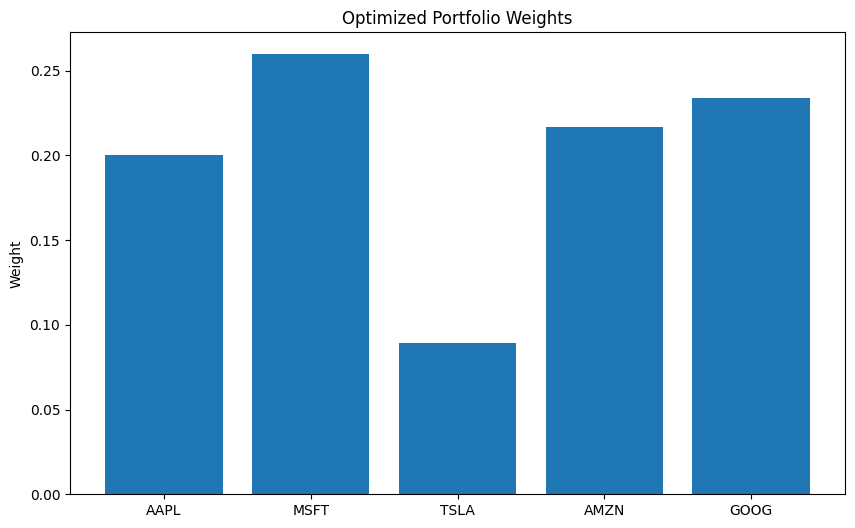

In [6]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, scores_array)
print("Final Portfolio Weights:", portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)

Total Portfolio Return: 147.66%
Annualized Portfolio Return: 147.66%


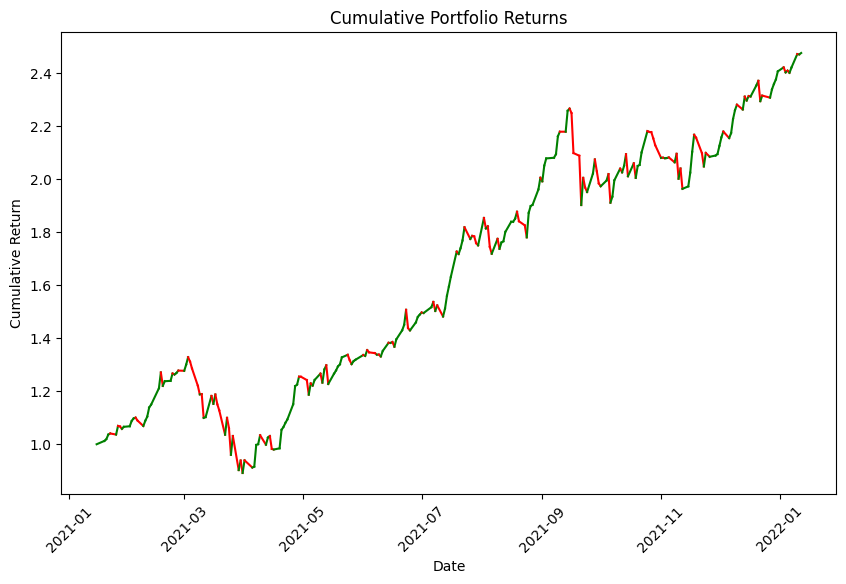

In [7]:
# Step 2: Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, portfolio_weights)

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']

# Filter data for the specific date range
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, filtered_data)

In [ ]:
# Example usage
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

# Calculate MACD for a specific date (e.g., '2021-01-15')
macd_signal = calculate_macd_signal(data, tickers, '2021-01-15')

# Print the resulting signal scores
print(macd_signal)


[*********************100%***********************]  5 of 5 completed

[['AAPL', np.float64(-0.8174513739657803)], ['MSFT', np.float64(-0.9849152513913664)], ['TSLA', np.float64(1.8872193344183685)], ['AMZN', np.float64(-0.6475118760441482)], ['GOOG', np.float64(-0.12669492198268156)]]


In [9]:
scores = [score[1] for score in macd_signal]
# Convert to a NumPy array if needed
scores_array = np.array(scores)

print(scores_array)

[-0.81745137 -0.98491525  1.88721933 -0.64751188 -0.12669492]


     pcost       dcost       gap    pres   dres
 0: -5.1576e+00 -3.2419e+00  2e+01  5e+00  1e+00
 1: -9.9483e-01 -1.9725e+00  1e+00  9e-03  2e-03
 2: -1.0944e+00 -1.1813e+00  9e-02  7e-04  2e-04
 3: -1.1233e+00 -1.1306e+00  7e-03  2e-05  4e-06
 4: -1.1260e+00 -1.1268e+00  8e-04  2e-16  1e-16
 5: -1.1262e+00 -1.1262e+00  7e-05  6e-17  2e-16
 6: -1.1262e+00 -1.1262e+00  9e-07  2e-16  3e-16
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.33481608508948624), 'MSFT': np.float64(0.6384769134428182), 'TSLA': np.float64(3.0399229604945336e-09), 'AMZN': np.float64(0.026706983130457638), 'GOOG': np.float64(1.5297315048535185e-08)}
Final Portfolio Weights: [3.34816085e-01 6.38476913e-01 3.03992296e-09 2.67069831e-02
 1.52973150e-08]


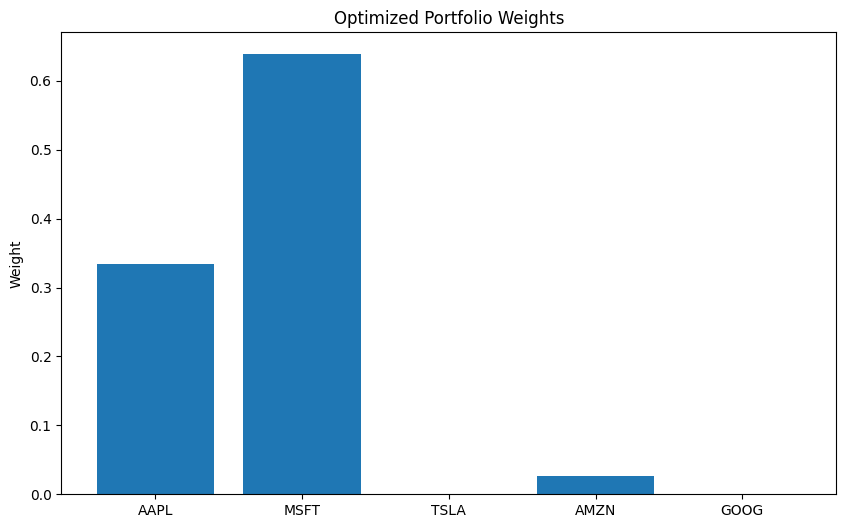

In [10]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, scores_array)
print("Final Portfolio Weights:", portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)

Total Portfolio Return: 76.57%
Annualized Portfolio Return: 76.57%


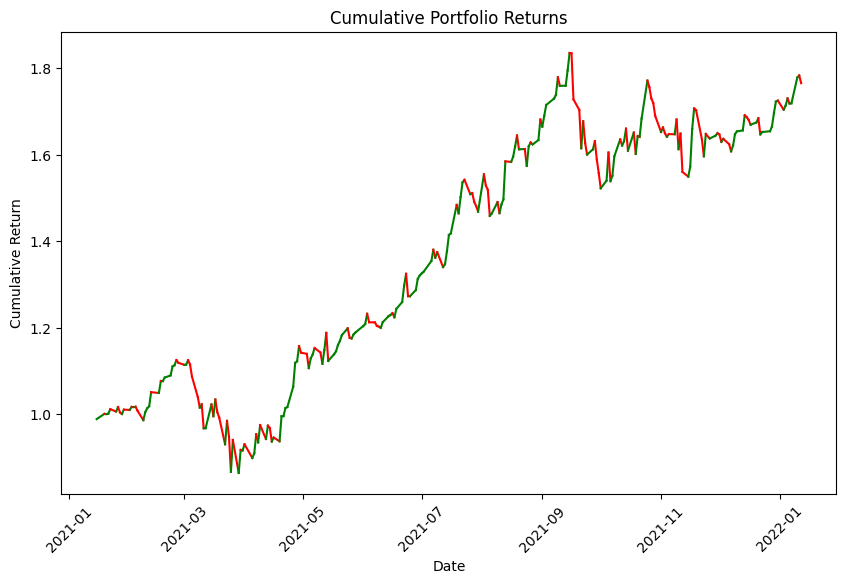

In [11]:
# Step 2: Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, portfolio_weights)

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']

# Filter data for the specific date range
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, filtered_data)